In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

diabetes = pd.read_csv('/Users/quasar/Downloads/diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
print("Diabetes data se dimensions :{}".format(diabetes.shape))

Diabetes data se dimensions :(768, 9)


In [14]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

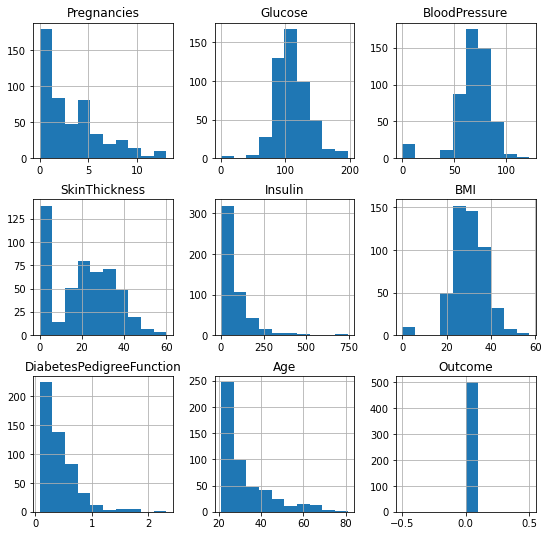

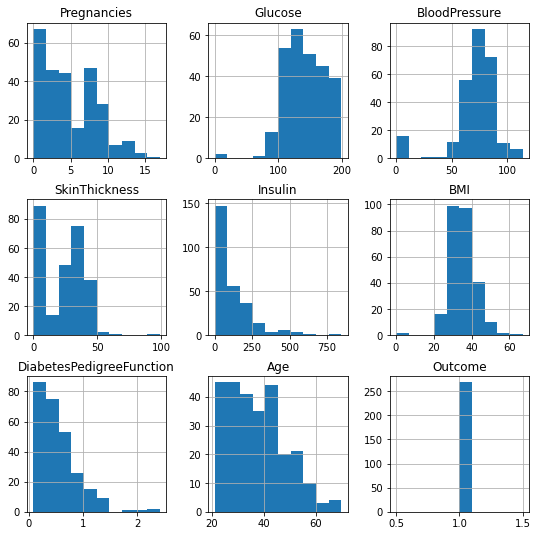

In [16]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

In [17]:
# missing or Null data points

diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# unexpected outliers i.e. zero blood pressure - false values 

print("Total :", diabetes[diabetes.BloodPressure == 0].shape[0])

print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total : 35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [20]:
# zero plasma glucose levels

print("Total :", diabetes[diabetes.Glucose == 0].shape[0])

print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total : 5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [23]:
# Skin Fold thickness less than 10mm not possible

print("Total :", diabetes[diabetes.SkinThickness == 0].shape[0])

print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total : 227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [26]:
# Exclude cases of zero BMI
print("Total :", diabetes[diabetes.BMI == 0].shape[0])

print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total : 11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [28]:
# exclude cases of zero insulin 

print("Total :", diabetes[diabetes.Insulin == 0].shape[0])

print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total : 374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [31]:
# removing data rows which "BloodPressure", "BMI" and "Glucose"

diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

print(diabetes_mod.shape)


(724, 9)


In [63]:
features_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_mod[features_names]
y = diabetes_mod.Outcome
print(X.head())

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6      148             72  ...  33.6                     0.627   50
1            1       85             66  ...  26.6                     0.351   31
2            8      183             64  ...  23.3                     0.672   32
3            1       89             66  ...  28.1                     0.167   21
4            0      137             40  ...  43.1                     2.288   33

[5 rows x 8 columns]


In [64]:
# Model selection - "Classification Accuracy(Testing Accuracy) of a given set of classification models with their default parameters to determine which model performs better with the diabetes data set"

# focus on KNN, SVM, Logistic Regression, Gaussian Naive Bayes, Random Forest, and Gradient Boost 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [72]:
# using any one method 1. Train/Test split 2. K-Fold Cross validation 
# use accuracy_score to evaluate the accuracy of the model in the train/test split method

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [73]:
# train/Test split with scikit learn 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)


In [74]:
# fit each model in a loop and calculate the accuracy of the respective model using the "accuracy_score"

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.762431
3   DT  0.723757
4  GNB  0.734807
5   RF  0.779006
6   GB  0.773481


In [79]:
# using K-Fold Cross validation with Scikit Learn

from sklearn.model_selection import KFold

names = []
scores = []

for name, model in models:
    
    kfold = KFold(n_splits = 10, random_state = 10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

print(kf_cross_val)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.